In [1]:
import celltypist
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy
import anndata as ad
import os 

In [2]:
os.chdir('..')
os.chdir('..')

In [3]:
reference = sc.read_h5ad("data/full_fetal_brain/h5ad/down_fullref.h5ad")

hiPSC_WA09 = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_Astro.h5ad")
hiPSC_FCDI = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_FCDI.h5ad")
hiPSC_Glu = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_Glu.h5ad")

hiPSC_WA09.obs["CellClass"] = hiPSC_WA09.obs.ident
hiPSC_FCDI.obs["CellClass"] = hiPSC_FCDI.obs.ident
hiPSC_Glu.obs["CellClass"] = hiPSC_Glu.obs.ident

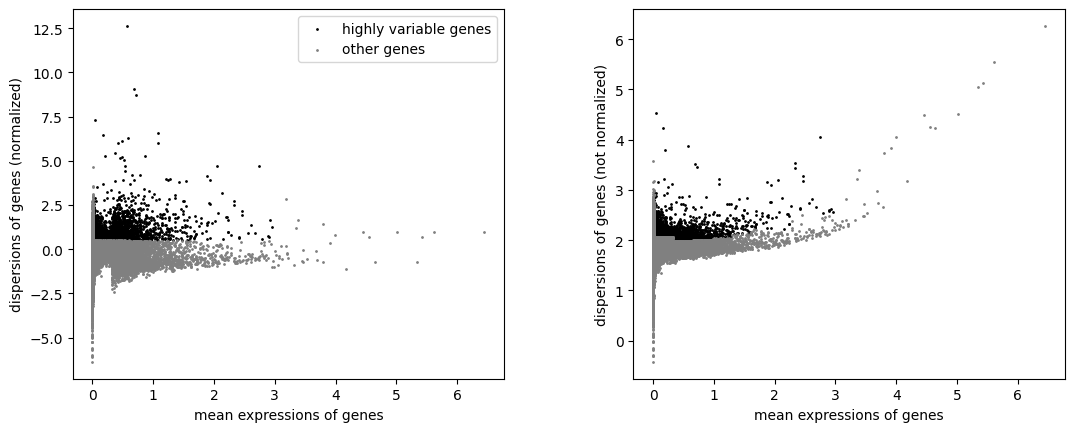

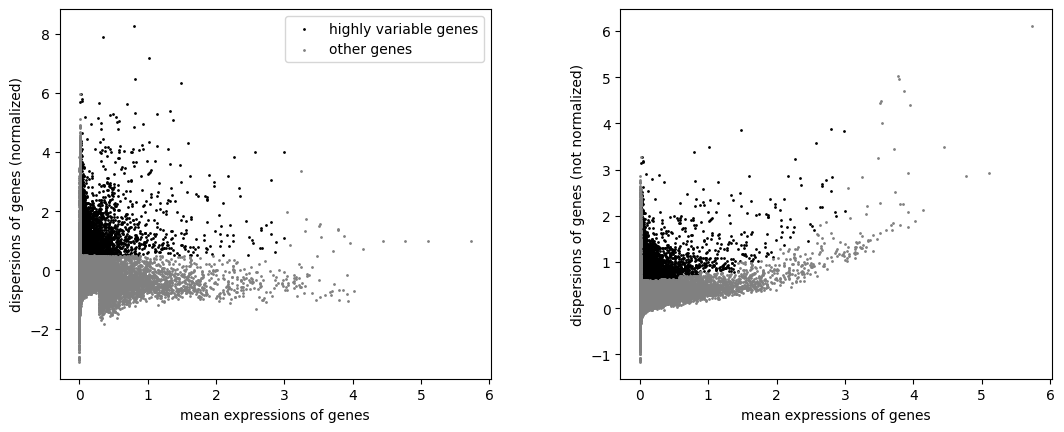

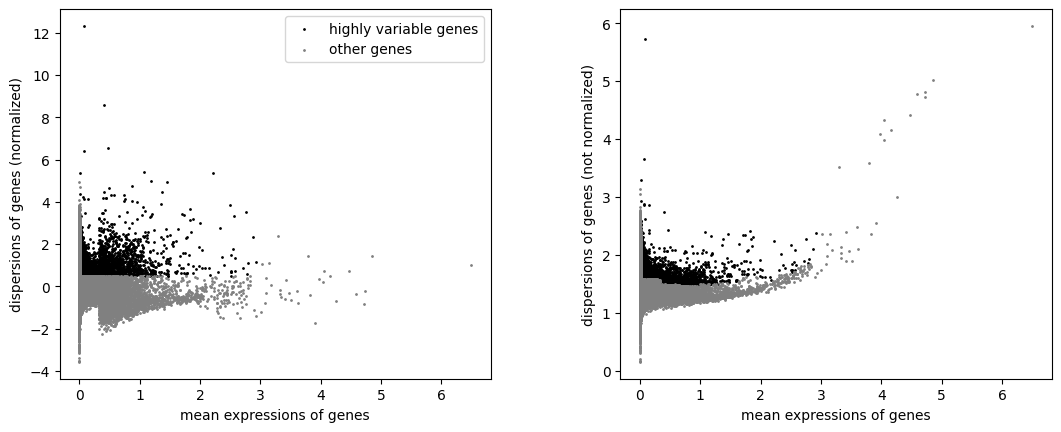

In [5]:
sc.pp.normalize_total(hiPSC_WA09, target_sum=1e4)
sc.pp.log1p(hiPSC_WA09)
sc.pp.highly_variable_genes(hiPSC_WA09, min_mean=0.0125, max_mean=3,min_disp=0.5)
sc.pl.highly_variable_genes(hiPSC_WA09)


sc.pp.normalize_total(hiPSC_FCDI, target_sum=1e4)
sc.pp.log1p(hiPSC_FCDI)
sc.pp.highly_variable_genes(hiPSC_FCDI, min_mean=0.0125, max_mean=3,min_disp=0.5)
sc.pl.highly_variable_genes(hiPSC_FCDI)

sc.pp.normalize_total(hiPSC_Glu, target_sum=1e4)
sc.pp.log1p(hiPSC_Glu)
sc.pp.highly_variable_genes(hiPSC_Glu, min_mean=0.0125, max_mean=3,min_disp=0.5)
sc.pl.highly_variable_genes(hiPSC_Glu)

sc.pp.normalize_total(reference, target_sum=1e4)
sc.pp.log1p(reference)

In [6]:
model2 = celltypist.train(reference,labels = 'CellClass', n_jobs = 10,max_iter=1000, feature_selection = True)
prediction_query1= celltypist.annotate(hiPSC_WA09, model = model2, majority_voting=True)
prediction_query2= celltypist.annotate(hiPSC_FCDI, model = model2, majority_voting=True)
prediction_query3 = celltypist.annotate(hiPSC_Glu, model = model2, majority_voting=True)

adata_query1 = prediction_query1.to_adata()
adata_query2 = prediction_query2.to_adata()
adata_query3 = prediction_query3.to_adata()

🍳 Preparing data before training
✂️ 17996 non-expressed genes are filtered out
🔬 Input data has 45000 cells and 41484 genes
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
🔎 Selecting features
🧬 1759 features are selected
🏋️ Starting the second round of training
🏋️ Training data using logistic regression
✅ Model training done!
🔬 Input data has 10921 cells and 19055 genes
🔗 Matching reference genes in the model
🧬 1440 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


WA09 predicted labels


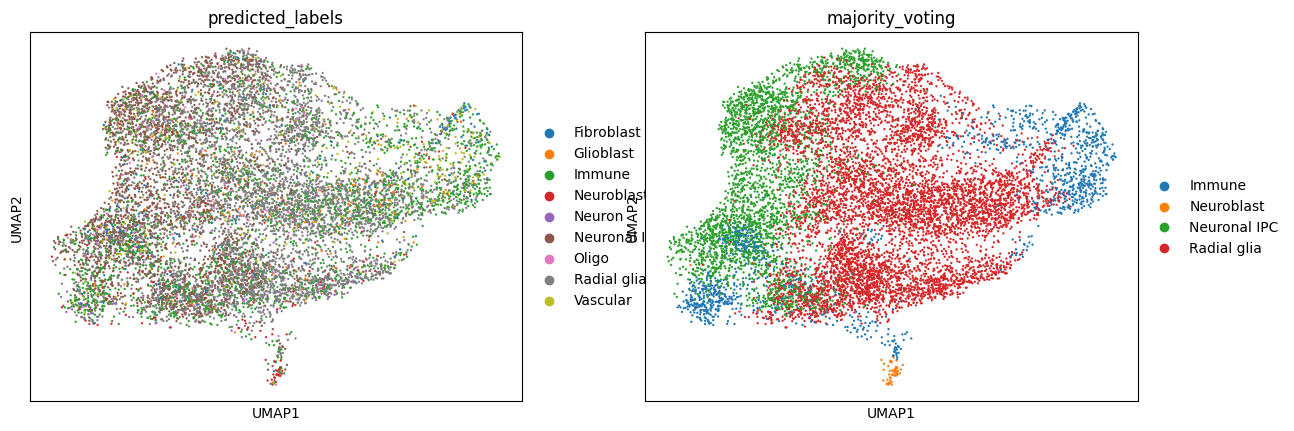

FCDI Astro predicted labels


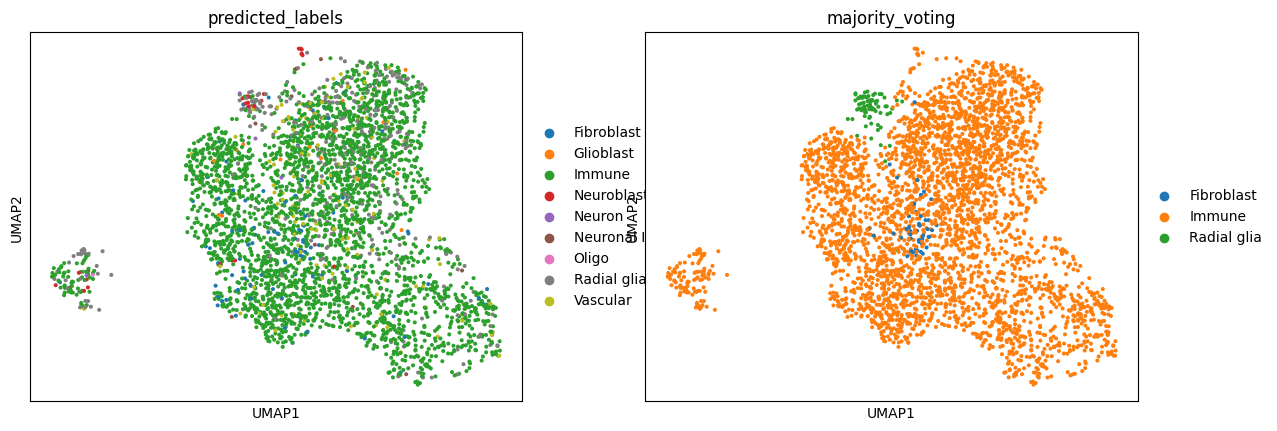

Glutamate Neurons predicted labels


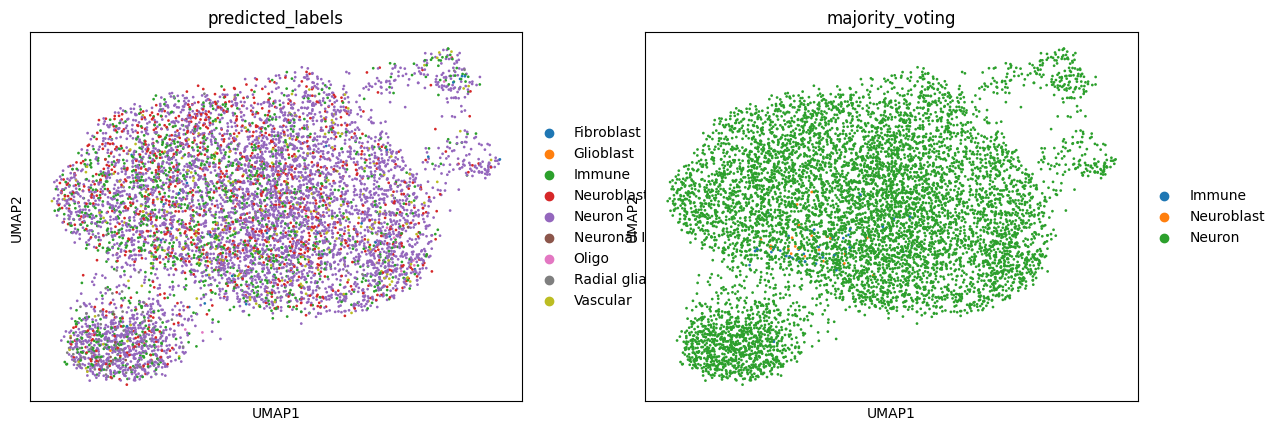

In [12]:
print("WA09 predicted labels") 
sc.tl.umap(adata_query1)
sc.pl.umap(adata_query1, color=["predicted_labels","majority_voting"])

print("FCDI Astro predicted labels") 
sc.tl.umap(adata_query2)
sc.pl.umap(adata_query2, color=["predicted_labels","majority_voting"])

print("Glutamate Neurons predicted labels")
sc.tl.umap(adata_query3)
sc.pl.umap(adata_query3, color=["predicted_labels","majority_voting"])

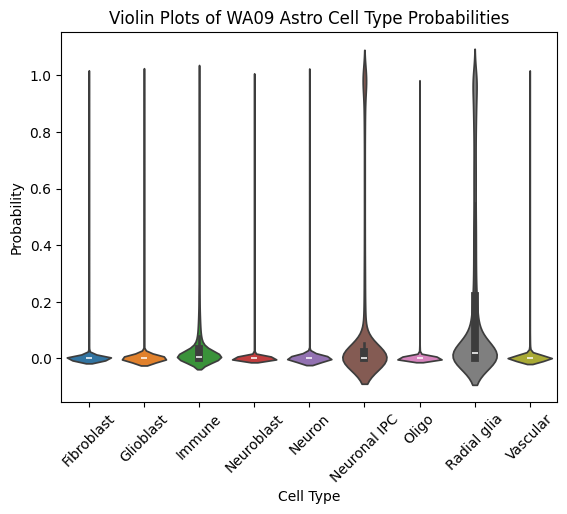

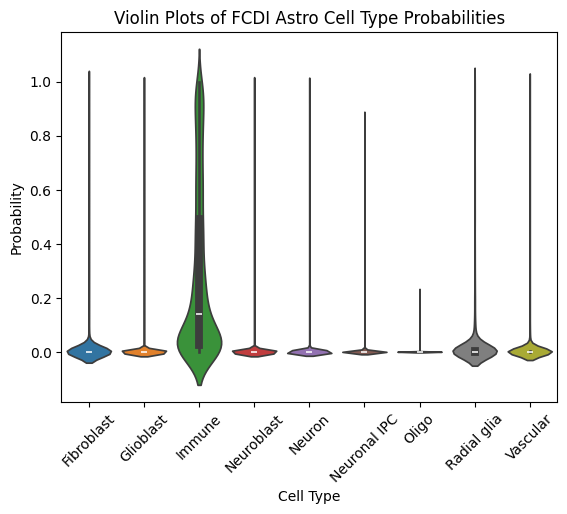

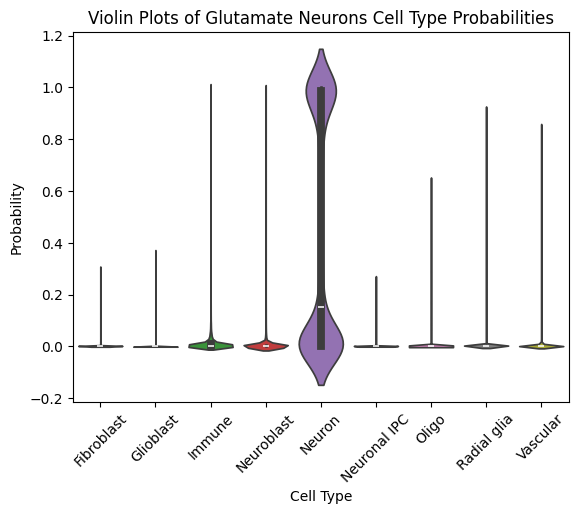

In [14]:
# Create a violin plot for each column in the same figure
plt.figure()

# Melt the DataFrame to a long format required for Seaborn's violin plot
# Plot
sns.violinplot(data=prediction_query1.probability_matrix)

# Customize plot
plt.title("Violin Plots of WA09 Astro Cell Type Probabilities")
plt.xlabel("Cell Type")
plt.xticks(rotation=45)
plt.ylabel("Probability")

# Show the plot
plt.show()


# Create a violin plot for each column in the same figure
plt.figure()

# Melt the DataFrame to a long format required for Seaborn's violin plot
# Plot
sns.violinplot(data=prediction_query2.probability_matrix)

# Customize plot
plt.title("Violin Plots of FCDI Astro Cell Type Probabilities")
plt.xlabel("Cell Type")
plt.xticks(rotation=45)
plt.ylabel("Probability")

# Show the plot
plt.show()

# Create a violin plot for each column in the same figure
plt.figure()

# Melt the DataFrame to a long format required for Seaborn's violin plot
# Plot
sns.violinplot(data=prediction_query3.probability_matrix)

# Customize plot
plt.title("Violin Plots of Glutamate Neurons Cell Type Probabilities")
plt.xlabel("Cell Type")
plt.xticks(rotation=45)
plt.ylabel("Probability")

# Show the plot
plt.show()